<a href="https://colab.research.google.com/github/Johyeonje/Deep_Learning_Books/blob/master/Hands_On_Chap_10_ANN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

#케라스를 사용한 인공 신경망 소개

##10.1생물학적 뉴런에서 인공 뉴런까지

**ANN** : 인공 신경망(artificial neural network)

###10.1.2 뉴런을 사용한 논리 연산

인공뉴런 : 하나 이상의 이진(on/off) 입력과 이진 출력 하나를 가짐.    


###다층 퍼셉트론(multi-layer perceptron = MLP)

퍼셉트론(perceptron) : TLU(threshold)또는 LTU(Linear threshold uint)이라고 불리며 입력의 가중치 합에 계단 함수를 적용하는 뉴런

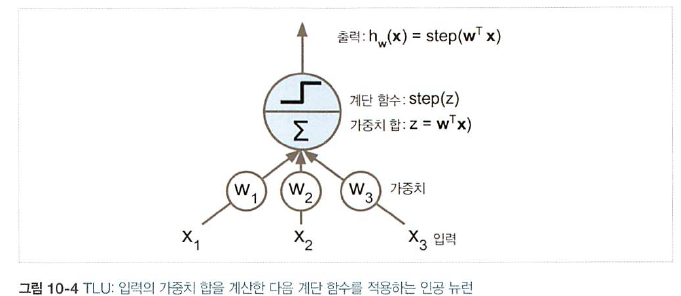

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/TLU.png', width=800)

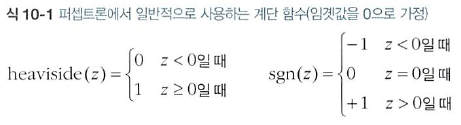

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/TLU2.png', width=700)

헤비사이드 계단 함수(Heaviside step function) : 가장 일반적으로 사용되는 계단함수로 가중치

* 퍼셉트론은 하나뿐인 TLU로 구성된다.
* 각 TLU는 모든 입력에 연결되어 있다.
* 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 완전 연결 층(fully connected layer = FC layer)또는 밀집 층(dense layer)라고 부른다.

####퍼셉트론의 단계

* **입력 뉴런**이라 불리는 층에 입력
  * 입력층(input layer)은 모두 입력 뉴런으로 구성되며 편향(bias)특성이 더해짐
    * 전형적으로 편향 특성은 항상 1을 출력하는 편향 뉴런(bias neuron)으로 표현

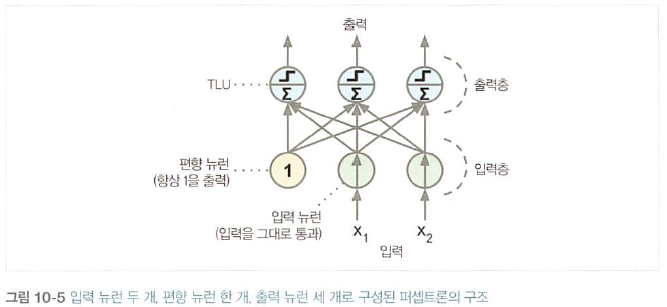

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/TLU3.png', width=700)

다음 그림은 두개의 입력과 세개의 출력으로 구성된 퍼셉트론이다.    
샘플을 다른 이진 클래스로 동시 분류할 수 있기 때문에 다중 출력 분류기(multiouput classification)이다.    
선형 대수학을 통해 여러 샘플에 대해 출력을 한번에 계산할 수 있다.

**완전 연결 층의 출력**  : $h_{W,b}(X)=\phi(XW+b)$

* $X$는 입력 특성의 행렬
* 가중치 행렬 $W$는 편향 뉴런을 제외한 모든 연결 가중치를 포함. 행은 입력 뉴런, 열은 출력층의 인공 뉴런
* 편향 벡터 $b$는 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치를 포함. 인공 뉴런마다 하나의 편향 값 존재
* $\phi$를 활성화 함수(activation function)라고 부름. 인공 뉴런이 TLU일 경우 계단 함수

퍼셉드론의 훈련 알고리즘 : **헤브의 규칙 (Hebb's rule)**에서 비롯됨        


**가중치 업데이트의 규칙**

$w_{i,j}^{(next step)}=w_{i,j}+\eta(y_i-\hat{y}_i)x_i$

* $w_{i,j}$는 $i$번째 입력 뉴런과 $j$번째 출력 뉴런 사이를 연결하는 가중치
* $x_i$는 현재 훈련 샘플의 $i$번째 뉴런의 입력값
* $\hat{y}_j$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 출력값
* $y_j$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 타깃값
* $lr$은 학습률

퍼셉트론 수렴이론(perceptron convergence theorem) : 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2,0.5]])

퍼셉트론의 학습 알고리즘은 확률적 경사하강법과 매우 흡사하다 = SGDClassifier    
퍼셉트론을 여러 개 쌓아 올리면 일부 제약을 줄일 수 있다. 이러한 인공 신경망을 다중 퍼셉트론이라고 한다.

###10.1.4 다중 퍼셉트론 역전파

`다중 퍼셉트론 = 입력층(1) + 은닉층(TLU 多) + 출력층(1)`    
입력층과 가까운 층 : 하위 층    
출력층과 가까운 층 : 상위 층

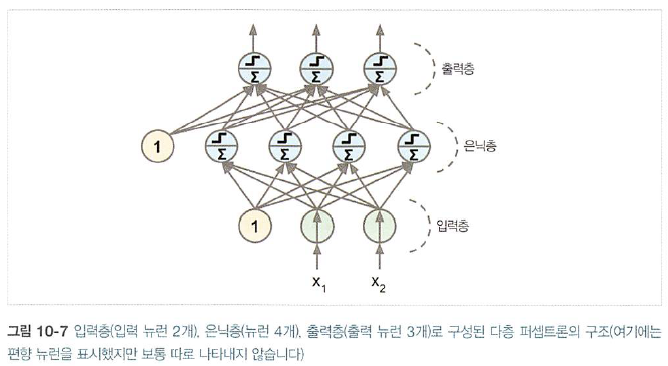

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/MLP.png', width=700)

심층 신경망(deep neural network = DNN) : 은닉층을 여러 개 쌓아 올린 인공 신경망    
역전파(backpropagation) 훈련 알고리즘 : 효율적인 기법으로 gradient를 자동으로 계산하는 경사 하강법    
* 네트워크를 정방향으로 한번, 역방향으로 한번 통과하는 것만으로 모든 모델 파라미터에대한 네트워크 오차의 gradient를 계산할 수 있다.

**역전파의 흐름**    
1. 입력층 부터 출력층 까지 계산을 마친다 (정방향 계산)
2. 알고리즘이 네트워크 출력의 오차를 측정
3. 각 출력 연결이 오차에 기여하는 정도(gradient)를 계산(연쇄 법칙을 적용하여 빠르고 정확하게 수행)
4. 이런 방식으로 입력층에 도달할 때까지 역방향으로 가중치가 오차에 기여한 정도를 측정
5. 모든 연결 가중치에 대한 오차 gradient를 측정
6. 마지막으로 경사 하강법을 수행하여 방금 계산된 오차 gradient를 사용해 네트워크의 모든 연결 가중치 수정(경사하강법)

이런 역전파의 시도 중에 계단함수에서 로지스틱(시그모이드) 함수로 전환   

####활성화 함수
* 하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수)
  * $tanh(z) = 2\sigma(2z)-1$ 로지스틱 함수처럼 S자 모양에 연속적이고 미분 가능
  * 하지만 출력 범위가 -1에서 1사이이다.
  * 이 범위는 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있다. = 빠르게 수렴    
* ReLU 함수
  * $ReLU(z)=max(0,z)-1$ 연속적이지만 z=0에서 미분이 불가능하다.
  * 실제로 잘 작동하고 계산 속도가 빠르다는 장점이 있다.
  * 출력값에 최댓값이 없어 경사 하강법에 있는 일부 문제를 완화해준다.

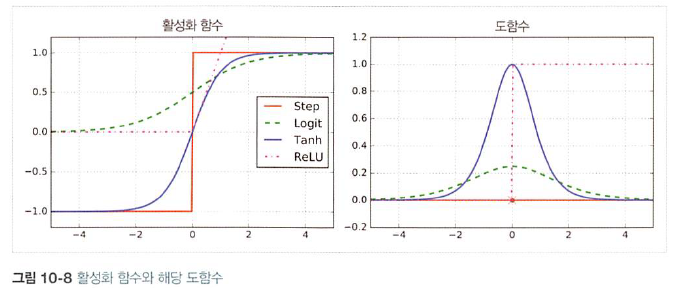

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/activation function.png', width=700)

###10.1.5 회귀를 위한 다층 퍼셉트론

* 다중 퍼셉트론으로 회귀 작업을 통해 값을 예측할 때는 출력 차원당 출력 뉴런이 하나씩 필요하다.    
* 일반적으로 회귀용 다중 퍼셉트론엔 활성함수를 사용하지 않지만 양수만이 필요한 경우 ReLU를 적용하기도 한다.    
* 손실함수는 전형적으로 평균 제곱 오차(MSE)이다. 이상치가 많을 경우 평균 절댓값 오차

* 입력 뉴런 수     : 특성마다 하나
* 은닉층 수        : 문제에 따라 다름 일반적으로 1 ~ 5
* 은닉층의 뉴런 수 : 문제에 다라 다른 일반적으로 10 ~ 100
* 출력 뉴런 수     : 예측 차원마다 하나
* 은닉층의 활성화 함수 : ReLU
* 출력층의 활성화 함수 : 없거나 출력이 양수일 때 ReLU
* 손실 함수 : MSE나 이상치가 있다면 MAE/Huber

###10.1.6 분류를 위한 다층 퍼셉트론

다중 퍼셉트론으로 다중 레이블 이진 분류 문제를 쉽게 해결할 수 있다.

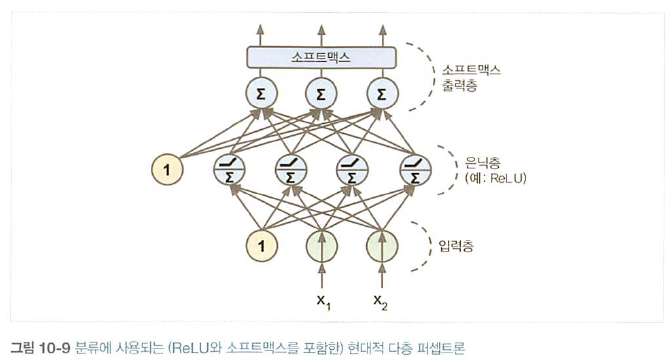

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/MLP_class.png', width=700)

확률 분포를 예측해야 하므로 손실 함수로 일반적으로 크로스 엔트로피 손실(cross entropy loss)을 선택하는 것이 좋다.

* 입력층과 은닉층 : 회귀와 동일
* 출력 뉴런 수 : 이진 분류(1개), 다중 레이블 분류(레이블 마다 1개), 다중 분류(클래스마다 한개)
* 출력층의 활성화 함수 : 이진 분류, 다중 레이블 분류(로지스틱 함수), 다중 분류(소프트맥스 함수)
* 손실 함수 : 크로스 엔트로피

##10.2 케라스로 다층 퍼셉트론 구현하기


###10.2.1 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

층의 모든 파라미터에 get_weights()와 set_weights() 메서드를 사용해 접근할 수 있다.

In [ ]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)

[[ 0.01153842  0.05040968  0.00375549 ...  0.03027866  0.05449468
  -0.00297189]
 [ 0.02032492 -0.07222785 -0.0346118  ...  0.00805763 -0.01234055
  -0.05675185]
 [ 0.02942947 -0.01720247 -0.01040919 ...  0.03528675  0.01501957
   0.01098647]
 ...
 [ 0.02286262 -0.0133601  -0.03427122 ... -0.05798091  0.03375063
  -0.0124976 ]
 [-0.04115063  0.04910203  0.03830437 ... -0.06252989 -0.05685218
   0.02340531]
 [-0.06676988  0.03881434 -0.02234302 ...  0.00065288 -0.06072029
  -0.01672566]]
(784, 300)


In [ ]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


Dense 층은 연결 가중치를 무작위로 초기화하고, 편향은 0으로 초기화 된다.    
다른 초기화 방법으로는 층을 만들 때 kernel_initializer, bias_initializer 매개변수를 설정할 수 있다.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

위아래가 같다

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

* 본 mnist dataset의 경우 레이블이 0~9까지의 정수로 이루어져 있고, 클래스가 배타적이므로 "sparse_categorical_crossentropy" 손실을 사용한다.    
* 레이블이 [0, 0, 1, 0]과 같이 원-핫 벡터라면 대신 "categorical_crossentropy" 손실을 사용한다.    
* 하나 또는 그 이상의 이진 레이블을 가진 이진 분류를 수행한다면 출력층에 "softmax"함수 대신 "sigmoid"함수를 사용하고 "binary_crossentropy"손실을 사용한다.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

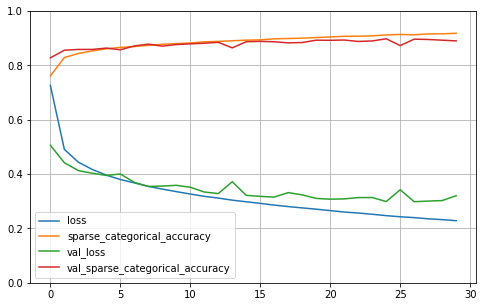

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

* 훈련 초기에 마치 검증 손실이 훈련 손실보다 낮게 보인다. 사실 아니다.
* 검증 손실은 에포크가 끝난 후에 계산되고 훈련 손실은 에포크가 진행되는 동안 계산된다.    
* 따라서 훈련 곡선은 에포크의 절반만큼 왼쪽으로 이동해야 한다.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3559 - sparse_categorical_accuracy: 0.8765


[0.35586482286453247, 0.8765000104904175]

* 테스트 세트에서 성능이 좀더 낮게 나온다. 검증에서는 하이퍼파라미터의 튜닝을 했기 때문이다.
* 하지만 테스트 세트에서는 하이퍼파라미터 튜닝 시 일반화 오차를 너무 낙관적으로 추정하게 된다.

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

###10.2.3 시퀀셜 API를 사용한 회귀용 다층 퍼셉트론

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
              keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
              keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

###10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

* input 객체 생성
* Dense 층 생성 - 이 층은 만들어지자마자 입력과 함께 함수처럼 호출 = 함수형 API
* 두 번째 은닉층 생성 - 출력 전달에 주목
* Concatenate층 생성 두 번째 은닉층의 출력과 입력을 연결(?)   
keras.layers.concatenate() 함수를 사용하여 층을 만들고 주어진 입력으로 바로 호출 가능
* 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용해 호출
* 마지막으로 입출력을 지정하여 케라스 Model 생성

####특성을 분리하여 원하는 층에 입력하는 방법

* 5개 특성은 짧은 경로로, 6개 특성은 깊은 경로로 보내기

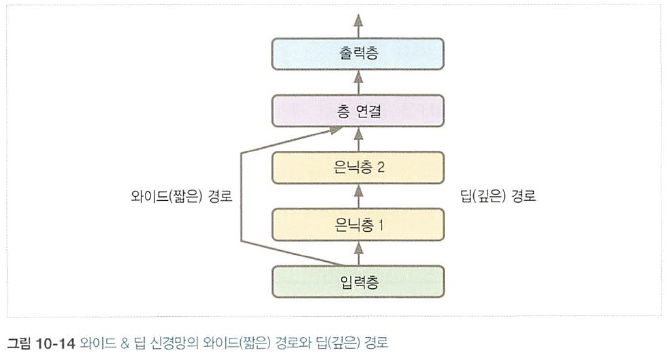

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/wide&deep_network.png', width=700)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

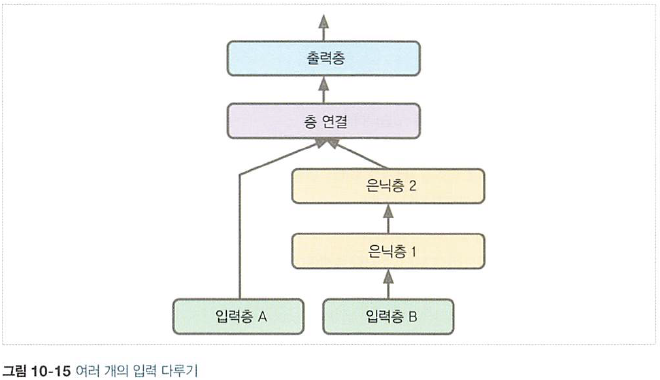

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/multi_input.png', width=700)

모델이 이렇게 복잡해지면 가장 중요한 층에는 이름을 붙이는 것이 좋다.   
모델을 만들 때 inputs=[input_A, input_B]로 지정했기 때문에 모델 컴파일은 이전과 동일하지만 모델 학습시에는 튜플의 형태로 (X_train_A, X_train_B)를 전달해야 한다.X_valid도 마찬가지이다.   
evaluate나 predict시에도 X_test와 X_new의 형태가 튜플의 형태이다.

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 2.1445 - val_loss: 0.9894
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8056 - val_loss: 0.7452
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6647 - val_loss: 0.6649
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6257 - val_loss: 0.6353
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6026 - val_loss: 0.6136
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5959
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5672 - val_loss: 0.5812
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5545 - val_loss: 0.5697
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5429 - val_loss: 0.5580
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5329 - val_loss: 0.5523

####여러 개의 출력이 필요한 경우
* 여러 출력이 필요한 작업을 할 때, 예를 들어 그림에 있는 주요 물체를 분류하고 위치를 알아야 하는 경우, 회귀 작업(물체 중심의 좌표와 너비, 높이)과 분류 작업을 동시에 진행
* 동일한 데이터에서 독립적인 여러 작업을 수행할 때, 물론 작업마다 새로운 신경망을 훈련할 수 있지만, 작업마다 하나의 출력을 가진 단일 신경망을 훈련하는 것이 보통 더 나은 결과를 낸다. 신경망이 여러 작업에 걸쳐 유용한 특성을 학습할 수 있기 때문, 예를 들어 얼굴 사진으로 다중 작업 분류 수행이 가능하다.
* 규제 기법으로 사용하는 경우이다. 예를 들어 신경망 구조 안에 보조 출력을 추가할 수 있다. 보조 출력을 사용해 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는지 확인

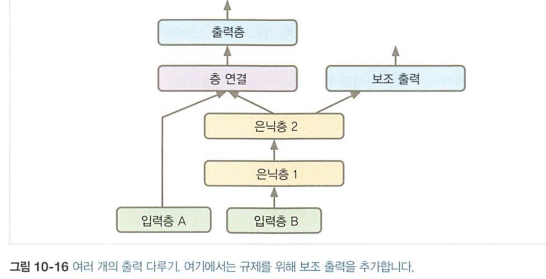

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Hands_On_ML/images/sub_output.png', width=700)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
# 출력층 까지는 동일
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


원래 출력의 형식에 보조 출력의 output을 지정하고, input의 유형을 두가지로 지정한 것 처럼 output을 두 가지로 지정하는 것이다.

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

각 출력은 손실 함수를 필요로한다. 따라서 컴파일에도 손실 함수를 리스트로 전달해야한다.   
```python
loss_weights = [0.9, 0.1]
```
기본적으로 케라스는 나열된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용하기 때문에 보조 출력보다 주 출력에 더 많은 가중치를 부여해야한다.(보조 출력은 규제에만 사용되므로) 이때 loss_weights를 통해서 손실 가중치를 지정할 수 있다.

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 7ms/step - loss: 1.0683 - main_output_loss: 0.9592 - aux_output_loss: 2.0506 - val_loss: 0.7268 - val_main_output_loss: 0.6566 - val_aux_output_loss: 1.3579
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8787 - main_output_loss: 0.8328 - aux_output_loss: 1.2913 - val_loss: 0.6674 - val_main_output_loss: 0.6009 - val_aux_output_loss: 1.2652
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6032 - main_output_loss: 0.5544 - aux_output_loss: 1.0419 - val_loss: 0.5808 - val_main_output_loss: 0.5331 - val_aux_output_loss: 1.0101
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5376 - main_output_loss: 0.4984 - aux_output_loss: 0.8911 - val_loss: 0.5360 - val_main_output_loss: 0.4975 - val_aux_output_loss: 0.8822
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4964 - main_output_loss: 0.4635 - aux_output_loss: 0.7925 - val_loss

이제 모델을 훈련할 때 각 출력에 대한 레이블을 제공해야한다.   
주 출력과 보조 출력이 같은 것을 예측해야 하므로 동일한 레이블을 사용한다.   
따라서 y_train 대신에 (y_train, y_train)를 전달한다.(y_valid와 y_test)도 동일

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.3761 - main_output_loss: 0.3563 - aux_output_loss: 0.5546


#####! 다중 출력의 평가
다중 output을 사용하면 평가항목이 두개더라도 total을 포함한 세개가 나온다.

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

###10.2.5 서브 클래싱 API로 동적 모델 만들기

시퀀셜 API와 함수형 API는 모두 선언적(declarative)인데, 사용할 층과 연결 방식을 먼저 정의한다는 뜻이다.   
그 다음 모델에 데이터를 주입하여 훈련이나 추론을 시작할 수 있다.   
**선언적 특징의 장점**
* 모델을 저장, 복사, 공유하기 쉽다.
* 모델의 구조를 출력하거나 분석하기 좋다.
* 프레임워크가 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있다..
* 전체 모델이 층으로 구성된 정적 그래프이므로 디버깅하기도 쉽다.   
   

**선언적 특징의 단점**
* 반복이나 다양한 크기를 다루는 등 여러 동적 구조를 요구하는 등 명령형 프로그래밍 스타일을 필요로할 경우   
==> 서브클래싱 API 사용

간단한 Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만든다.   
그다음 call() 메서드 안에 수행하려는 연산을 기술한다.   
예를 들어 다음 WideAndDeepModel 클래스의 인스턴스는 앞서 함수형 API로 만든 모델과 동일한 기능을 수행한다. 이전에 했던 것처럼 이 인스턴스를 사용해 모델 컴파일, 훈련, 평가, 예측이 가능하다.

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate(input_A, hidden2)
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

본 코드는 함수형 API와 매우 비슷하지만 Input 클래스의 객체를 만들 필요가 없다.    
대신 call() 메서드의 input 매개변수를 사용한다. 생성자에 있는 층 구성과 call() 메서드에 있는 정방향 계산을 분리한다.   
주된 차이점은 call() 메서드 안에서 원하는 어떤 계산도 사용할 수 있다는 것이다.   
for문, if문과 같이 텐서플로 저수준 연산도 가능하다. 다양한 시도를 해보자!   

유연성이 높아지는 만큼 비용이 발생한다.
1. 모델 구조가 call() 메서드 안에 숨겨져 있기 때문에 케라스가 이를 쉽게 분리할 수 없다. 즉, 모델의 저장과 복사가 불가능하다.   
2. summary() 메서드를 호출하면 층의 목록만 나열되고 층 간의 연결 정보를 얻을 수 없다.   
3. 케라스가 타입과 크기를 미리 확인할 수 없어 실수가 발생(인적 실수인가 기계적 실수인가?)하기 쉬움
    
그렇기 때문에 높은 유연성이 필요없다면 시퀀셜 API와 함수형 API를 쓰는게 좋다.

###10.2.6 모델 저장과 복원

시퀀셜 API와 함수형 API를 사용 시 훈련된 케라스 모델 저장

In [ ]:
model = keras.models.Sequential([...])
model.compile([...])
model.fit([...])
model.save("my_keras_mode.h5")

케라스의 모델 저장 포맷 : HDF5   
저장 사항 : 모델 구조와 모든 층의 하이퍼파라미터, 모델 파라미터(연결 가중치와 편향), 옵티마이저   
   
모델 로드 방법은 다음과 같다.

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

하지만 이런 저장 방식은 장시간 모델을 훈련시키는 경우에 다양한 사고로 인해 저장되기 전에 훈련된 모델을 잃는 경우가 생긴다.   
이를 위해 체크포인트를 저장하는 개념인 콜백(callback)을 fit 메서드에 포함시키면 된다.

###10.2.7 콜백 사용하기

fit() 메서드의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있다.   
또는 epoch의 시작이나 끝, 각 배치 처리 전후에 호출할 수도 있다.   
ModelCheckpoint는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장한다. -> 기본적으로 매 epoch의 끝에서 호출

In [ ]:
[...] # 모델 만들고 컴파일
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

훈련동안 ```save_best_only = True```로 세팅한다면 과대적합할 걱정없이 검증세트 점수가 최상일 때만 모델이 저장된다.    
다음은 조기 종료의 구현이다.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")  # 최상의 모델로 복원

조기 종료를 구현하는 또 다른 방법은 EarlyStopping 콜백을 사용하는 것이다.   
일정 epoch 동안 검증 세트의 점수가 향상되지 않으면 훈련을 멈춘다.   
선택적으로 최상의 모델을 복원할 수 있다. 이와 더불어 시간과 컴퓨팅 자원을 낭비하지 않을 수 있다.

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

주의할 점은 모델 조기종료의 EarlyStopping의 patience 설정 값을 너무 작게 잡으면 아직 더 성능을 낼 수 있는 상황에서 조기종료 되어버릴 수 있기 때문에 적당한 수치로 조정하는 것이 필요하다.   
   
다음은 사용자 정의 콜백함수이다. 예를 들어 훈련 동안 검증 손실과 훈련 손실의 비율을 출력할 수 있따.(과대적합 감지)

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

**구현 가능한 사용자 정의 함수**
* on_train_begin() : 학습 시작
* on_train_end() : 학습 종료
* on_epoch_begin() : 매 epoch 시작
* on_epoch_end() : 매 epoch 종료
* on_batch_begin() : 매 mini batch 시작
* on_batch_end() : 매 mini batch 종료   
   
평가에도 사용 가능하다.
* on_test_begin(), on_test_end(), on_test_batch_begin(), ...
   
예측에도 사용 가능하다.
* on_predict_begin(), ...

###10.2.8 텐서보드를 사용해 시각화하기

텐서보드(tensorboard) : 인터렉티브 시각화 도구로 훈련하는 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있다.   
   
텐서보드를 사용하려면 프로그램을 수정하여 이벤트 파일(event file)이라는 이진 로그 파일에 시각화하려는 데이터를 준비해야 한다.   
각각의 이빈 데이터 레코드를 서머리(summary)라고 부른다.   
텐서보드 서버는 로그 디렉터리를 모니터링하고 자동으로 변경사항을 읽어 그래프를 업데이트한다.   
실시간으로 여러번 실행한 프로그램 결과를 시각화하여 비교할 수 있다.

먼저 텐서보드 로그를 위해 루트 로그 디렉터리를 정의한다.   
로그 파일의 파일 명은 날짜와 시간 등으로 구분해야 편하다.

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
[...]
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_A, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
    data = (np.random.randn(100)+2) * step/100
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2,32,32,3)
    tf.summary.image("my_images", images * step / 1000, step=step)
    texts = ["The step is " + str(step), "Its squars is " + str(step**2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
    audio=tf.reshape(tf.cast(sine_wave, tf.float32), [1,-1,1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

```python
tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
```
tf.summary.scalar     : 스칼라 서머리 출력 함수   
"my_scalar"           : 스칼라 명   
np.sin(step/10)       : 데이터
step=step             : 스칼라 출력 단계
```python
tf.summary.histogram("my_hist", data, buckets=50, step=step)
```
tf.summary.histogram : 히스토그램 서머리 출력 함수
buckets              : 버킷의 갯수 ( 분기점을 의미하는 듯 함)
```python
tf.summary.image("my_images", images * step / 1000, step=step)
```
tf.summary.image     : 이미지 서머리 출력 함수

##10.3 신경망 하이퍼파라미터 튜닝하기

GridSearchCV나 RandomizedSearchCV를 사용해 하이퍼파라미터 공간 탐색   
1. 케라스 모델을 사이킷런 추정기처럼 보이도록 바꾸어야한다.   
먼저 케라스 모델 생성

In [ ]:
import tensorflow
import tensorflow.keras as keras
import numpy as np


In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.adD(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

위 함수는 주어진 입력 크기와 은닉층 개수, 뉴런 개수로 (한 개의 출력만 있는) 단변량 회귀를 위한 간단한 Sequential 모델은 만든다.   
컴파일은 지정된 학습률, SGD 옵티마이저로 지정한다.   
build_model() 함수를 이용해 KerasRegressor 클래스의 객체 생성

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

KerasRegressor : build_model()로 만들어진 케라스 모델을 감싸는 간단한 래퍼(wrapper)이다.   
이 객체를 만들 때 어떤 하이퍼파라미터도 지정하지 않았으므로 build_model()에 정의된 기본 하이퍼파라미터를 사용한다.   
아래 코드와 같이 훈련, 평가, 예측이 가능하다.

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validtion_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

NameError: ignored

fit()메서드에 지정한 모든 매개변수는 케라스 모델로 전달된다.   
사이킷런은 손실이 아닌 점수로 계산한다. 점수는 음수의 MSE이다.   
   
하이퍼파라미터 탐색 수행 (RandomizedSearch)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model.selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

RandomizedSearchCV는 k-겹 교차 검증을 사용하기 때문에 X_valid와 y_vaild를 사용하지 않는다.   
이 데이터는 조기 종료에만 사용된다.   
랜덤 탐색은 하드웨어와 데이터셋의 크기, 모델의 복잡도, n_iter, cv 매개변수에 따라 몇 시간이 걸릴 수 있다.   
실행이 끝나면 랜덤 탐색에서 찾은 최상의 하이퍼파라미터와 훈련된 케라스 모델을 얻는다.   

하이퍼파라미터 랜덤 탐색을 이용하면 성능이 좋은 모델을 얻기 쉽지만 시간이 너무 오래 걸리면 탐색할 수 있는 하이퍼파라미터의 공간 제약이 생긴다.   
그러므로 넓은 범위에서 탐색을 진행하고 점차 좁은 범위의 탐색으로 나아가는 식으로 좋은 하이퍼 파라미터 집합을 좁혀나갈 수 있다. 하지만 이 방법 역시 시간이 많이 소요되고 최상의 방법은 아니다.   
훨씬 더 효율적인 탐색 방법으로 **탐색 지역이 좋다고 판명될 때 더 탐색을 수행**하는 방법이 있다.   
이 기법은 수동으로 탐색 영역을 좁혔던 작업을 대신 관리하여 훨씬 적은 시간에 더 나은 솔루션을 만든다.

하이퍼파라미터 최적화 파이썬 라이브러리
* Hyperopt : 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 라이브러리
* Hyperas, kopt, talos : 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리
* 케라스 튜너(Keras Tuner) : 사용하기 쉬운 케라스 하이퍼파라미터 최적화 라이브러리
* Scikit-Optimize(skopt) : 범용 최적화 라이브러리. BayesSearchCV 클래스는 GridSearchCV와 비슷한 인터페이스 사용   
* Spearmint : 베이즈 최적화 라이브러리
* Hyperband : 빠른 파이퍼파라미터 튜닝 라이브러리
* Sklearn-Deap : GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘(evolutionary algorithm) 기반의 하이퍼파라미터 최적화 라이브러리

###10.3.1 은닉층 개수

은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 개수가 충분하면 복잡한 함수도 모델링할 수 있다.   
하지만 복잡한 문제에서는 심층 신경망의 파라미터 효율성이 훨씬 높다.   
심층 신경망은 얕은 신경망보다 같은 함수를 모델링 하는 데 훨씬 적은 뉴선수를 사용하므로 동일한 양의 훈련 데이터에 더 높은 성능을 낼 수 있다.   
    
예를 들어 숲을 그리기 위해서 잎을 합쳐 가지를 만들고 가지를 합쳐서 나무를 만들며 이 나무를 합쳐 숲을 만드는 것처럼 계층적으로 구조를 구성하면 저수준부터 고수준 까지의 모델링에 유리하다는 것이다.   
   
뿐만 아니라 심층 신경망이 좋은 솔루션으로 빠르게 수렴하게끔 도와줄 뿐 아니라 새로운 데이터에 일반화되는 능력도 향상시킨다. 새로운 신경망을 훈련할 때도 전에 사용했던 모델의 신경망의 가중치와 편향값으로 초기화 시킴으로써 저수준 구조를 학습할 수고를 덜어줄 수 있다는 뜻이다. 이런 기술을 전이 학습(transfer learning)이라고 한다.   
   
이 때문에 네트워크를 처음부터 훈련하는 경우는 드물고 비슷한 작업에서 가장 뛰어난 성능을 낸 미리 훈련된 네트워크의 일부를 재사용하는 것이 일반적이다. 이는 훈련 속도도 훨씬 빠르고 데이터도 훨씬 적게 필요하다.

###10.3.2 은닉층의 뉴런 개수

입력층과 출력층의 뉴런 개수는 작업에 필요한 입출력의 형태에 따라 결정된다.   
은닉층은 일반적으로 많은 수의 저수준 뉴런으로부터 적은 수의 고수준 뉴런으로 구성된다.   
저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문이다.   
하지만 이 구성은 요즘엔 일반적이지 않다. 대부분의 경우 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 낸다. 

층의 개수와 마찬가지로 네트워크가 과대적합되기 전까지 점진적으로 뉴런 수를 늘릴 수 있다. 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고 과대적합되지 않도록 조기 종료와 규제 기법을 사용하는 것이 효과적이다.

###10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

####학습률
* 가장 중요한 하이퍼 파라미터
* 일반적으로 최적의 학습률은 최대 학습률(발산하는 학습률)의 절반 정도이다.
* 좋은 학습률을 찾는 법은 매우 낮은 학습률에서 큰 학습률까지 여러번 반복하여 모델을 훈련하는 것이다.
* 학습률 조정ㅇ르 반복하면서 일정한 학습률을 곱한다(예를 들어 $10^{-5}$부터 10까지 exp($log(10^6)/500$)를 500번 반복하여 곱한다.
* 학습률에 대한 손실은 초반에 줄어들지만 학습률이 커지면 동시에 커질 수 있다. 최적의 학습률은 손실이 다시 상승하는 지점보다 조금 아래이다.(일반적으로 상승점보다 약 10배 낮은 지점)
* 최적의 학습률은 다른 하이퍼파라미터에 영향을 많이 받고, 특히 배치 크기에 영향을 많이 받기 때문에 다른 하이퍼파라미터에 따라 학습률 역시 조정해주어야 한다.

####옵티마이저
* 고전적인 평범한 미니배치 경사 하강법보다 더 좋은 옵티마이저를 선택하는 것이 중요하다.

####배치 크기
* 배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미친다.
* 큰 배치 크기를 사용하는 것의 주요 장점은 GPU와 같은 하드웨어 가속기를 효율적으로 활용하여 훈련 알고리즘이 초당 더 많은 샘플을 처리할 수 있다는 것이다.
* 권장은 GPU RAM에 맞는 가장 큰 배치 크기를 사용하는 것이다.
* 하지만 작은 배치크기로 학습한 모델보다 성능이 떨어질 수 있다.
* 학습률 예열(warming up)방식(작은 학습률부터 점점 커지는 것)등 배치 크기에 대한 다양한 의견이 있다.

####활성화 함수
* 일반적으로 ReLU 함수가 모든 은닉층에 좋은 기본값이다.
* 출력층의 활성화 함수는 수행 작업에 따라 달라진다.

####반복 횟수
* 대부분의 경우 반복 횟수는 튜닝할 필요가 없고, 조기 종료를 사용한다.